In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

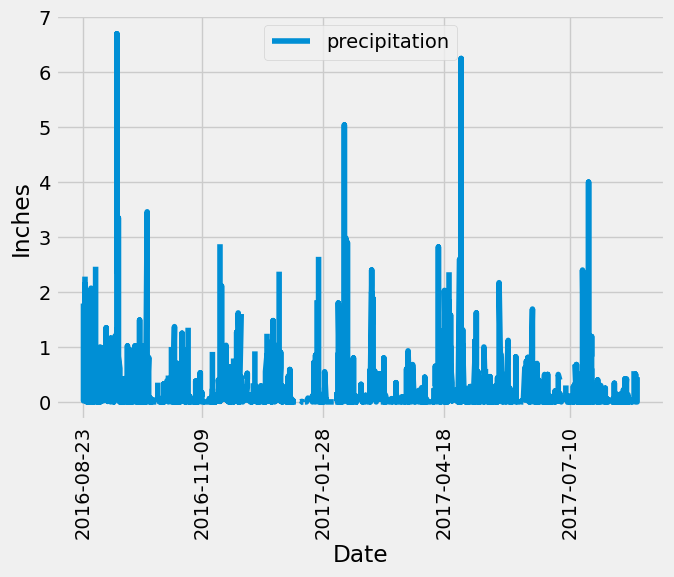

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year = int(most_recent_date[0][:4])
month = int(most_recent_date[0][5:7])
day = int(most_recent_date[0][8:10])
one_year_ago = dt.date(year,month,day) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between(one_year_ago,most_recent_date[0])).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(data, columns=['dates', 'precipitation'])

# Sort the dataframe by date
df = df.sort_values(by='dates', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax=plt.subplots(figsize = (7,5))
ax.plot('dates', 'precipitation', data = df)
xticks = ('2016-08-23','2016-11-09','2017-01-28','2017-04-18','2017-07-10')
ax.set_xticks(xticks)
ax.grid(True)
ax.set_xlabel('Date')
ax.set_ylabel('Inches')
ax.legend(labels=['precipitation'], loc = 'upper center')
plt.xticks(rotation=90)
plt.show()

In [23]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9,)]

In [25]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mvp_station_id = active_stations[0][0]
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == mvp_station_id).all()

[(54.0, 85.0, 71.66378066378067)]

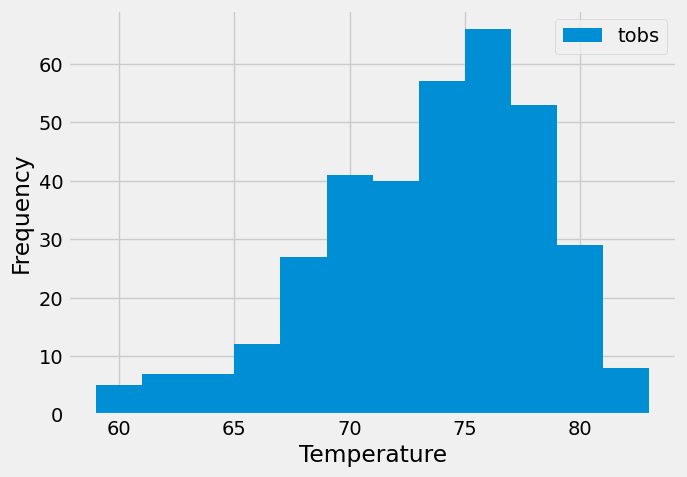

In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp =session.query(Measurement.tobs, Measurement.date).filter(Measurement.station == mvp_station_id).filter(Measurement.date.between(one_year_ago,most_recent_date[0])).all()

temp_dfv =pd.DataFrame(temp, columns=['Temperature', 'Date'])

# Plot histogram
fig, ax=plt.subplots(figsize =(7, 5))
ax.hist(temp_df['Temperature'], bins = 12)
ax.legend(['tobs'], loc='upper right')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close Session

In [16]:
# Close Session
session.close()